In [1]:
import modin.pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
from shapely import wkt
import geopandas as gpd

from modin.config import ProgressBar
from tqdm.auto import tqdm
# ProgressBar.enable()

# Tweets statistics

In [2]:
tweets = pd.read_parquet("tweets.parquet")  # , columns=["doy", "wforms_new"])

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-07-28 17:09:43,459	INFO worker.py:1636 -- Started a local Ray instance.


How many tweets do we have?

In [3]:
tweets.shape[0]

5319799

What's the approximate volume of textual data?

In [4]:
tweets["text_with_inlined_entities"].map(len).sum()

563674016

In [5]:
tweets

,created_at,user_id,place_id,point,text_with_inlined_entities
id,,,,,
1481053303203115000,2022-01-11 23:59:58+00:00,30426063,13626664301142557297,None,@rumba_magica Sangue del mio sangue! Più o m...
1481053302213288000,2022-01-11 23:59:58+00:00,3434521023,9032110026370769188,None,@nodittatura_ Guarda che hai preso una fregatu...
1481053276707688400,2022-01-11 23:59:52+00:00,959192415428120600,5916444963998743784,None,@GabryContessa @RaffaelePizzati @valerio_...
1481053257460031500,2022-01-11 23:59:47+00:00,1058283788550201300,16279968650146189607,None,@biscottoverde Io uguale e nera perché non e...
1481053245023924200,2022-01-11 23:59:44+00:00,708468999,17537396432332505395,None,@AnnalisaChirico Bassetti: «L'Italia faccia ...
...,...,...,...,...,...
1608976533309522000,2022-12-31 00:01:13+00:00,937784590860681200,7735322533558570181,None,@__m_u_r_p_h_y_ @Youridefou Archi efficace 😂
1608976387960082400,2022-12-31 00:00:38+00:00,1033723490720014300,9032110026370769188,None,@vivailtrashhh Mandate Oriana e luca Onestin...
1608976357660455000,2022-12-31 00:00:31+00:00,1569001835180036000,4724381571816379873,None,@aboubakar_soum @GiorgiaMeloni Quello che ...


# Places statistics

In [6]:
places = pd.read_parquet("places.parquet")
print(places.shape[0])
display(places["country_code"].value_counts(normalize=True)*100)
display(tweets.join(places, on="place_id")["country_code"].value_counts(normalize=True)*100)

34771


country_code
IT    47.042075
FR    12.104915
ES     9.119669
GB     7.572402
DE     4.693566
        ...    
US     0.005752
GI     0.002876
BY     0.002876
JE     0.002876
AM     0.002876
Name: proportion, Length: 65, dtype: float64

country_code
IT    92.358045
ES     1.521540
GB     1.015141
FR     0.938902
DE     0.811754
        ...    
LI     0.000246
GG     0.000057
IM     0.000038
JE     0.000019
AM     0.000019
Name: proportion, Length: 65, dtype: float64

## User distribution

How many users do we have?

In [7]:
tweets["user_id"].nunique()

153264

How does users' activity distribute?

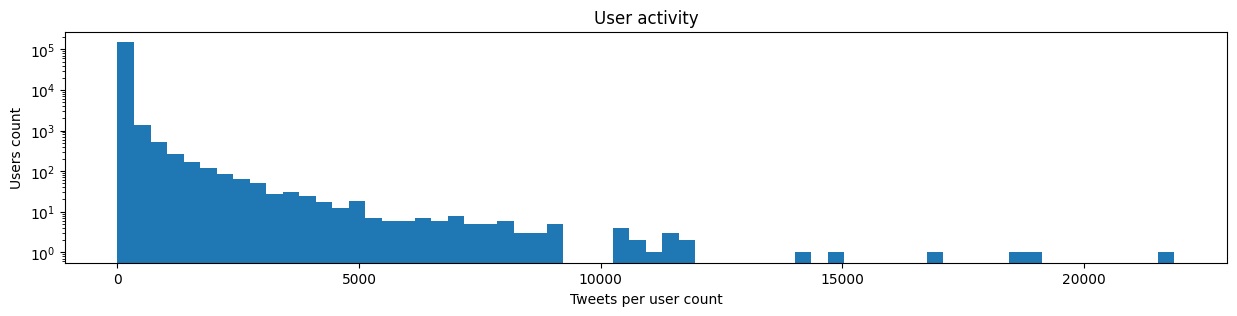

In [8]:
tweets.groupby("user_id").size().plot(
    kind="hist",
    log=True,
    bins=64,
    xlabel="Tweets per user count",
    ylabel="Users count",
    title="User activity",
    figsize=(15, 3),
)
plt.show()

## Time distribution

How are tweets distributed in terms of MoY, WoY, DoY and HoD?

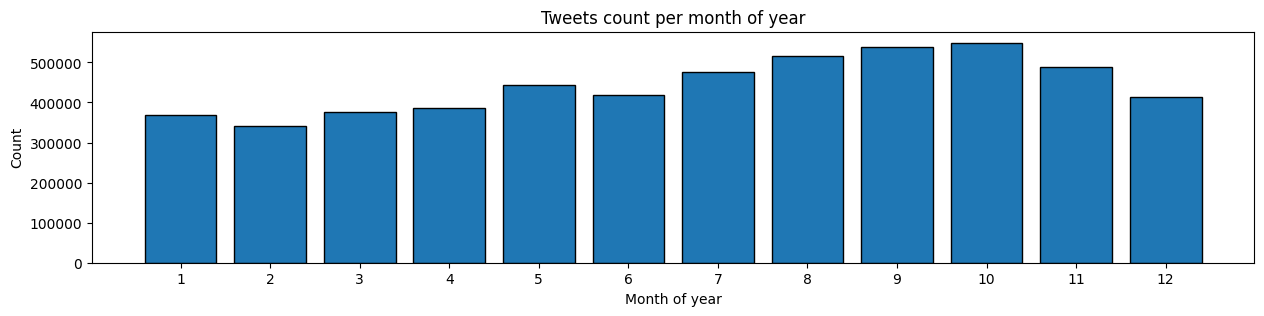

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


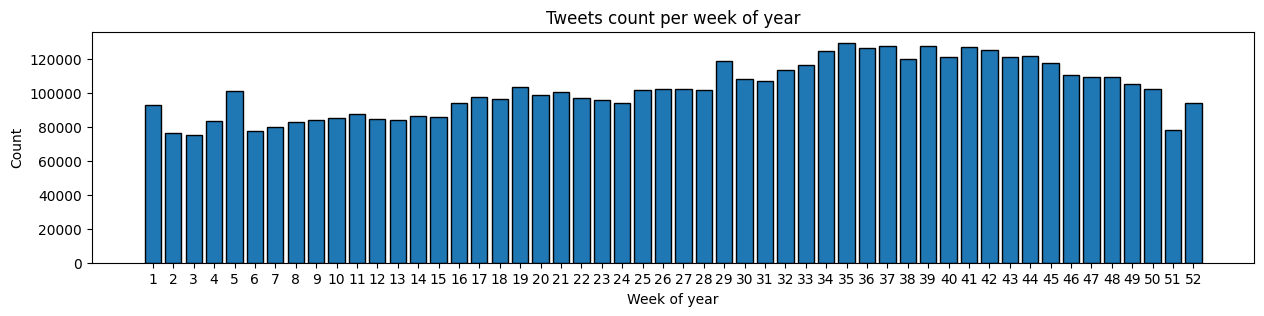

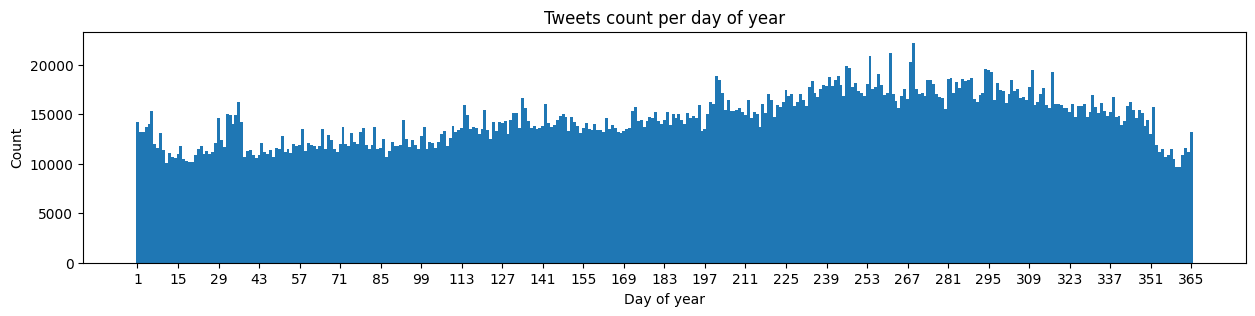

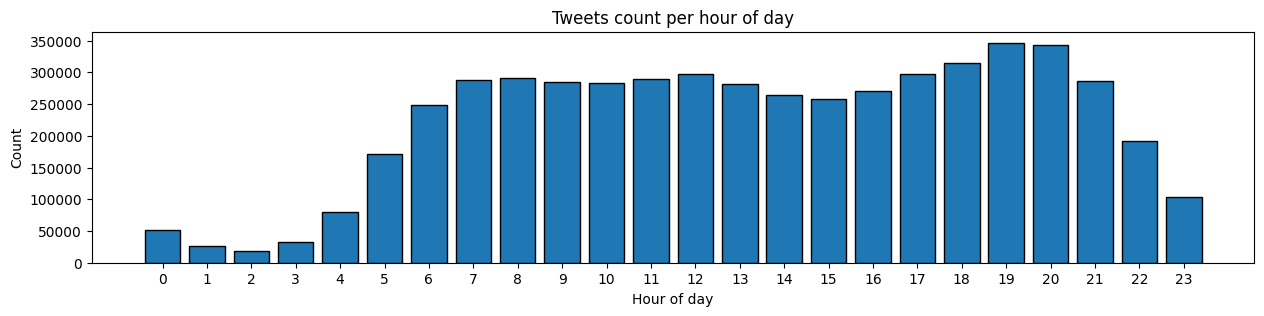

In [9]:
tweets["created_at"].dt.month.plot(
    kind="hist",
    bins=range(1, 12 + 2),
    xticks=range(1, 12 + 1),
    align="left",
    rwidth=0.8,
    edgecolor="black",
    xlabel="Month of year",
    ylabel="Count",
    title="Tweets count per month of year",
    figsize=(15, 3),
)
plt.show()

tweets["created_at"].dt.isocalendar().week.astype("int64").plot(
    kind="hist",
    bins=range(1, 52 + 2),
    xticks=range(1, 52 + 1),
    align="left",
    rwidth=0.8,
    edgecolor="black",
    xlabel="Week of year",
    ylabel="Count",
    title="Tweets count per week of year",
    figsize=(15, 3),
)
plt.show()

tweets["created_at"].dt.dayofyear.plot(
    kind="hist",
    bins=range(1, 365 + 2),
    xticks=range(1, 365 + 1, 14),
    align="left",
    xlabel="Day of year",
    ylabel="Count",
    title="Tweets count per day of year",
    figsize=(15, 3),
)
plt.show()

tweets["created_at"].dt.hour.plot(
    kind="hist",
    bins=range(0, 25),
    xticks=range(0, 24),
    align="left",
    rwidth=0.8,
    edgecolor="black",
    xlabel="Hour of day",
    ylabel="Count",
    title="Tweets count per hour of day",
    figsize=(15, 3),
)
plt.show()

## Space distribution

How many tweets are geolocalized with a place? How many with a point?

In [10]:
tmp = pd.DataFrame()

tmp["place_id_present"] = tweets["place_id"] != 0
tmp["point_present"] = ~tweets["point"].isna()
tmp = (
    tmp.groupby(["place_id_present", "point_present"]).size().reset_index(name="count")
)
tmp.sort_values("count", ascending=False, inplace=True)
tmp["percentage"] = tmp["count"] / tweets.shape[0] * 100

display(tmp)
del tmp

,place_id_present,point_present,count,percentage
2,True,False,4948697,93.024135
3,True,True,341208,6.413927
0,False,False,28015,0.526618
1,False,True,1879,0.035321


How many distinct places? How many points?

In [11]:
print("Distinct places:", tweets["place_id"].replace(0, np.nan).nunique())
print("Distinct points:", tweets[tweets["place_id"]!=0]["point"].nunique(), "(w/ place)")
print("Distinct points:  ", tweets[tweets["place_id"]==0]["point"].nunique(), "(w/o place)")

Distinct places: 34773
Distinct points: 56099 (w/ place)
Distinct points:   557 (w/o place)


In [12]:
places = pd.read_parquet("places.parquet", columns=["centroid"])
places["centroid"] = places["centroid"].apply(wkt.loads)
places = gpd.GeoDataFrame(
    places._to_pandas(),
    geometry="centroid",
    crs="EPSG:4326",
)
places.index.name = "place_id"

tweets_count_by_place = (
    tweets.groupby("place_id").size().reset_index(name="count").set_index("place_id")
)

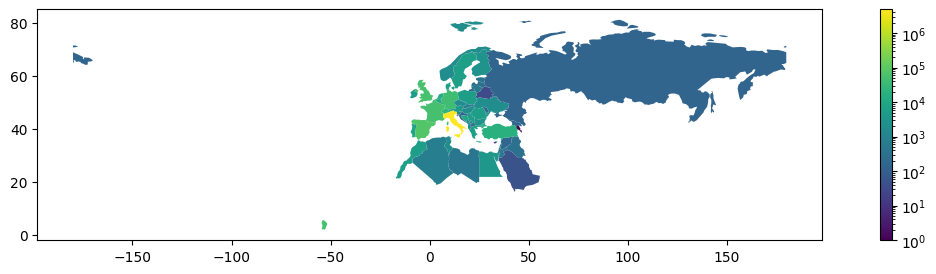

In [13]:
wld_nations_geojson_url = "https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/natural-earth-countries-1_110m@public/exports/geojson?lang=en&timezone=Europe%2FBerlin"
wld_nations = gpd.read_file(filename=wld_nations_geojson_url)
wld_nations = wld_nations[["geometry"]]

# The distance calculation is technically wrong in a geographic CRS, but there's no projected CRS covering the whole world.
# Also, we're probably close enough for our purposes -- we need just a reasonable approximation of "closest", not the distance.
places_to_nation = gpd.sjoin_nearest(
    places,
    wld_nations,
    how="left",
)
places_to_nation = places_to_nation[~places_to_nation.index.duplicated(keep="first")]
assert places_to_nation.index.is_unique

tweets_count_by_nation = gpd.GeoDataFrame(
    tweets_count_by_place._to_pandas()
    .join(places_to_nation)
    .groupby("index_right", dropna=False)
    .sum("count")
    .join(wld_nations),
    geometry="geometry",
    crs="EPSG:4326",
)

tweets_count_by_nation.plot(
    column="count",
    legend=True,
    vmin=0,
    figsize=(15, 3),
    norm=colors.LogNorm(vmin=1, vmax=tweets_count_by_nation["count"].max()),
)
plt.show()

del wld_nations_geojson_url, wld_nations, places_to_nation, tweets_count_by_nation

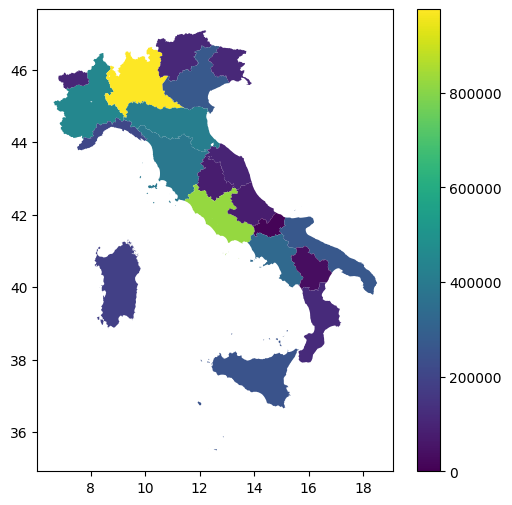

In [14]:
ita_regions_geojson_url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
ita_regions = gpd.read_file(filename=ita_regions_geojson_url)
ita_regions.set_index("reg_istat_code", inplace=True)
ita_regions.index.name = None
ita_regions.drop(columns=["reg_istat_code_num", "reg_name"], inplace=True)

# EPSG:4326 is WGS 84 geographic coordinate reference system for lat/lon coordinates.
# EPSG:32632 is UTM 32N projected coordinate reference system for UTM coordinates in zone 32, which covers Italy.
places_to_region = gpd.sjoin_nearest(
    places.to_crs("EPSG:32632"),
    ita_regions.to_crs("EPSG:32632"),
    how="left",
).to_crs("EPSG:4326")
places_to_region = places_to_region[~places_to_region.index.duplicated(keep="first")]
assert places_to_region.index.is_unique

tweets_count_by_region = gpd.GeoDataFrame(
    tweets_count_by_place._to_pandas()
    .join(places_to_region)
    .groupby("index_right", dropna=False)
    .sum("count")
    .join(ita_regions),
    geometry="geometry",
    crs="EPSG:4326",
)

tweets_count_by_region.plot(
    column="count",
    legend=True,
    vmin=0,
    figsize=(6, 6),
    # norm=colors.LogNorm(vmin=1, vmax=tweets_count_by_region["count"].max()),
)
plt.show()

del ita_regions_geojson_url, ita_regions, places_to_region, tweets_count_by_region

In [15]:
del places, tweets_count_by_place